# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

**❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?)**

* Récence
* Fréquence
* Montant

**❓ Can you summarize what each metric measures in one sentence?**

* La Récence : combien de temps s’est-il écoulé depuis la dernière activité du client (dernier achat ou dernière visite ou utilisation de l'application) ? Moins cela fait longtemps qu’un client a interagi avec la marque ou acheté un produit, plus il y a de chances qu’il réagisse favorablement aux sollicitations marketing qu’on lui soumet.<br>  <br>
* La Fréquence : au cours d’une période de temps donnée, combien de fois un client a-t-il acheté ou interagi avec la marque (engagement du client par rapport à la marque / Fidélisation) ?   <br> <br>
* Le Montant (en anglais « monetary ») : combien un client a-t-il dépensé d’argent au cours d’une période de temps donnée (gros acheteurs ou panier moyen montant/fréquence par exemple) ?  

**❓ What data / or type of data do you need for each metric ?**

* La Récence : order_purchase_timestamp / customer_unique_id / order_id<br>  <br>
* La Fréquence : customer_unique_id / order_purchase_timestamp / order_id ?_   <br> <br>
* Le Montant (en anglais « monetary ») : payment_value / customer_unique_id / order_purchase_timestamp / order_id<br> <br>

Let's explore the dataset!

# Exploratory Data Analysis

Load the dataset and start an Exploratory Data Analysis

In [86]:
import pandas as pd
import numpy as np
from datetime import datetime
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df_raw = pd.read_csv('db_customers.csv')
df = df_raw
# df_analyse = df.drop(['order_status', 'order_delivered_customer_date', 'payment_installments', 'payment_type', 'customer_zip_code_prefix', 'customer_city', 'customer_state'], axis=1)
df = df.drop_duplicates()
df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ Which features should be formated in datetime ? 
Convert them

In [108]:
len(df['customer_unique_id'].unique()) / len(df['customer_unique_id'])* 100

92.16942168933498

94399

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104366 entries, 0 to 105382
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104366 non-null  object 
 1   order_status                   104366 non-null  object 
 2   order_purchase_timestamp       104366 non-null  object 
 3   order_delivered_customer_date  101249 non-null  object 
 4   payment_type                   104365 non-null  object 
 5   payment_installments           104365 non-null  float64
 6   payment_value                  104365 non-null  float64
 7   review_score                   104366 non-null  int64  
 8   customer_unique_id             104366 non-null  object 
 9   customer_zip_code_prefix       104366 non-null  int64  
 10  customer_city                  104366 non-null  object 
 11  customer_state                 104366 non-null  object 
 12  product_category_name_english 

In [4]:
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)

<ipython-input-4-8ffa5b707875>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)


In [5]:
max(df['order_purchase_timestamp'])

Timestamp('2018-10-17 17:30:18')

❓ Which features are Categorical ? List the unique values on these features.

In [6]:
print(df['order_status'].unique())
print(df['payment_type'].unique())
print(df['review_score'].unique())
print(df['product_category_name_english'].unique())
print(df['payment_installments'].unique())

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
['credit_card' 'voucher' 'boleto' 'debit_card' 'not_defined' nan]
[4 5 2 1 3]
['housewares' 'perfumery' 'auto' 'pet_shop' 'stationery' nan
 'furniture_decor' 'office_furniture' 'garden_tools'
 'computers_accessories' 'bed_bath_table' 'toys'
 'construction_tools_construction' 'telephony' 'health_beauty'
 'electronics' 'baby' 'cool_stuff' 'watches_gifts' 'air_conditioning'
 'sports_leisure' 'books_general_interest' 'small_appliances' 'food'
 'luggage_accessories' 'fashion_underwear_beach' 'christmas_supplies'
 'fashion_bags_accessories' 'musical_instruments'
 'construction_tools_lights' 'books_technical' 'costruction_tools_garden'
 'home_appliances' 'market_place' 'agro_industry_and_commerce'
 'party_supplies' 'home_confort' 'cds_dvds_musicals'
 'industry_commerce_and_business' 'consoles_games' 'furniture_bedroom'
 'construction_tools_safety' 'fixed_telephony' 'drinks'
 'kitchen_dining_laundry_

❓ Check for missing values. What do you notice ? 


In [7]:
#order_delivered_customer_date et product_category_name_english ont beaucoup de valeurs manquantes
df.isna().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3117
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2354
dtype: int64

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [8]:
# La plupart de ces commandes n'ont été livrées. 
df_null = df[df['order_delivered_customer_date'].isnull()]
df_null['order_status'].value_counts()

shipped        1169
canceled        648
unavailable     641
invoiced        329
processing      315
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

❓ What are the proportions of each `order_status` ? 

In [9]:
df_count = df['order_status'].value_counts()/df.shape[0]*100
round(df_count,6).sort_values(ascending=False)

delivered      97.014353
shipped         1.120097
canceled        0.627599
unavailable     0.614185
invoiced        0.315237
processing      0.301822
created         0.004791
approved        0.001916
Name: order_status, dtype: float64

❓ Which `order_status` do you think should be removed from the analysis

* shipped         1.120097
* canceled        0.627599
* unavailable     0.614185
* invoiced        0.315237
* processing      0.301822
* created         0.004791
* approved        0.001916

In [10]:
df_delivered = df[df['order_status'] == "delivered"]
df_delivered

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ What feature would you choose in the e-commerce dataset provided? 

In [11]:
df_delivered = df_delivered.drop(['order_status', 'order_delivered_customer_date', 'payment_installments', 'payment_type', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'review_score', 'product_category_name_english' ], axis=1)
df_delivered

,order_id,order_purchase_timestamp,payment_value,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12,7c396fd4830fd04220f754e42b4e5bff
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00,7c396fd4830fd04220f754e42b4e5bff
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59,7c396fd4830fd04220f754e42b4e5bff
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46,af07308b275d755c9edb36a90c618231
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12,3a653a41f6f9fc3d2a113cf8398680e8
...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,85.08,6359f309b166b0196dbf7ad2ac62bb5a
105379,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,195.00,da62f9e57a76d978d02ab5362c509660
105380,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,271.01,737520a9aad80b3fbbdad19b66b37b30
105381,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,441.16,5097a5312c8b157bb7be58ae360ef43c


In [12]:
df_delivered['order_id'].value_counts()

ccf804e764ed5650cd8759557269dc13    22
68986e4324f6a21481df4e6e89abcf01    20
285c2e15bebd4ac83635ccc563dc71f4    19
fedcd9f7ccdc8cba3a18defedd1a5547    17
ee9ca989fc93ba09a6eddc250ce01742    17
                                    ..
3b71072f9d05c9bb81d0a43adf411715     1
446783bed4af912fc010915b3ead3b91     1
a742e3a941299687aed413c581a7dce9     1
b0df6117e4e96271f505589dcd78b944     1
fb9bb6436441ba78b79012524ca465c1     1
Name: order_id, Length: 96478, dtype: int64

❓ What method would you use to group the data? 

_Group by_

❓ What feature would you use to group the data? 

_customer_unique_id_

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

In [13]:
df_group = df_delivered.groupby(['customer_unique_id']).agg(
    {'payment_value': ['sum'], 
     'order_purchase_timestamp': ['max', 'min'],
     'order_id': lambda x: len(np.unique(x))})

df_group = pd.DataFrame(df_group)
df_group.columns = ['_'.join(col) for col in df_group.columns]
df_group = df_group.rename(columns={'payment_value_sum': 'Montant total',
                            'order_purchase_timestamp_max': 'Dernier achat',
                        'order_purchase_timestamp_min': 'Premier achat',
                        'order_id_<lambda>': 'Frequence',})

In [14]:
df_group['Panier_moyen'] = df_group['Montant total'] / df_group['Frequence']
df_group

,Montant total,Dernier achat,Premier achat,Frequence,Panier_moyen
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,2018-05-10 10:56:27,2018-05-10 10:56:27,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,2018-05-07 11:11:27,2018-05-07 11:11:27,1,27.19
0000f46a3911fa3c0805444483337064,86.22,2017-03-10 21:05:03,2017-03-10 21:05:03,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,43.62,2017-10-12 20:29:41,2017-10-12 20:29:41,1,43.62
0004aac84e0df4da2b147fca70cf8255,196.89,2017-11-14 19:45:42,2017-11-14 19:45:42,1,196.89
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,2017-06-08 21:00:36,2017-06-08 21:00:36,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,84.58,2017-12-10 20:07:56,2017-12-10 20:07:56,1,84.58
ffff371b4d645b6ecea244b27531430a,112.46,2017-02-07 15:49:16,2017-02-07 15:49:16,1,112.46


What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

_In datetime_

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least recent purchase?

In [15]:
min(df_group['Dernier achat'])

Timestamp('2016-09-15 12:16:38')

❓What is the date of the most recent purchase?

In [16]:
d_day = max(df_group['Premier achat'])

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

_d_day - dernier achat du client_

Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

In [17]:
date_format = "%m/%d/%Y"
a = df_group['Dernier achat']
b = d_day
df_group['Recence'] = b-a
df_group['Recence'] = df_group['Recence'].astype('timedelta64[D]')

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

In [18]:
df_group

,Montant total,Dernier achat,Premier achat,Frequence,Panier_moyen,Recence
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,2018-05-10 10:56:27,2018-05-10 10:56:27,1,141.90,111.0
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,2018-05-07 11:11:27,2018-05-07 11:11:27,1,27.19,114.0
0000f46a3911fa3c0805444483337064,86.22,2017-03-10 21:05:03,2017-03-10 21:05:03,1,86.22,536.0
0000f6ccb0745a6a4b88665a16c9f078,43.62,2017-10-12 20:29:41,2017-10-12 20:29:41,1,43.62,320.0
0004aac84e0df4da2b147fca70cf8255,196.89,2017-11-14 19:45:42,2017-11-14 19:45:42,1,196.89,287.0
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,2017-06-08 21:00:36,2017-06-08 21:00:36,1,2067.42,446.0
fffea47cd6d3cc0a88bd621562a9d061,84.58,2017-12-10 20:07:56,2017-12-10 20:07:56,1,84.58,261.0
ffff371b4d645b6ecea244b27531430a,112.46,2017-02-07 15:49:16,2017-02-07 15:49:16,1,112.46,567.0


Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [19]:
df_group.describe()

,Montant total,Frequence,Panier_moyen,Recence
count,93358.000000,93358.000000,93358.000000,93358.000000
mean,167.548579,1.033420,162.388468,236.941773
std,232.030559,0.209097,224.436104,152.591453
min,0.000000,1.000000,0.000000,0.000000
25%,62.980000,1.000000,62.292500,113.000000
50%,107.910000,1.000000,105.870000,218.000000
75%,183.877500,1.000000,177.615000,345.000000
max,13664.080000,15.000000,13664.080000,713.000000


Now that you have clusters for each category, explain the different buying behaviors

In [20]:
###Calculating quantile values
quintiles = df_group[['Recence', 'Frequence', 'Montant total']].quantile([.25, 0.50, 0.75]).to_dict()
###Benchmark to give score for recency indicator
def r_score(r):
    if r < quintiles['Recence'][.25]:
        return 1 
    elif r < quintiles['Recence'][.75]:
        return 2
    else: 
        return 3
###Benchmark to give score for frequency & monetary indicator.   
def fm_score(f): 
    if f > quintiles['Frequence'][.75]:
        return 1
    elif f > quintiles['Frequence'][.25]: 
        return 2
    else: 
        return 3
    
quintiles

{'Recence': {0.25: 113.0, 0.5: 218.0, 0.75: 345.0},
 'Frequence': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Montant total': {0.25: 62.98, 0.5: 107.91, 0.75: 183.8775}}

In [21]:
df_group_2 = df_group.copy()
df_group_2['r_score'] = df_group_2.Recence.apply(lambda x: r_score(x))
df_group_2['f_score'] = df_group_2.Frequence.apply(lambda x: fm_score(x))
df_group_2['m_score'] = df_group_2['Montant total'].apply(lambda x: fm_score(x))
df_group_2['rfm'] = df_group_2['r_score'].map(str)+df_group_2['f_score'].map(str) + df_group_2['m_score'].map(str)
df_group_2

,Montant total,Dernier achat,Premier achat,Frequence,Panier_moyen,Recence,r_score,f_score,m_score,rfm
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,2018-05-10 10:56:27,2018-05-10 10:56:27,1,141.90,111.0,1,3,1,131
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,2018-05-07 11:11:27,2018-05-07 11:11:27,1,27.19,114.0,2,3,1,231
0000f46a3911fa3c0805444483337064,86.22,2017-03-10 21:05:03,2017-03-10 21:05:03,1,86.22,536.0,3,3,1,331
0000f6ccb0745a6a4b88665a16c9f078,43.62,2017-10-12 20:29:41,2017-10-12 20:29:41,1,43.62,320.0,2,3,1,231
0004aac84e0df4da2b147fca70cf8255,196.89,2017-11-14 19:45:42,2017-11-14 19:45:42,1,196.89,287.0,2,3,1,231
...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,2017-06-08 21:00:36,2017-06-08 21:00:36,1,2067.42,446.0,3,3,1,331
fffea47cd6d3cc0a88bd621562a9d061,84.58,2017-12-10 20:07:56,2017-12-10 20:07:56,1,84.58,261.0,2,3,1,231
ffff371b4d645b6ecea244b27531430a,112.46,2017-02-07 15:49:16,2017-02-07 15:49:16,1,112.46,567.0,3,3,1,331


In [22]:
df_group_2.rfm.value_counts()

231    45420
331    22865
131    22271
211     1440
111      774
311      587
333        1
Name: rfm, dtype: int64

# Working with cohorts

**❓What is a cohort?** 

_des ensembles d’utilisateurs organisés en groupes en fonction d’un élément commun et d’une période donnée._  

* Cohort type: currently, the only option is acquisition date (the date of user’s first session)
* Cohort size: you can choose to define cohorts by day, by week, or by month. For instance, if you select by month, then each cohort represents the users acquired in a particular month (e.g. the January cohort includes all the users who had their first session in January)
* Date range: the window of time that you want to examine (e.g. the last 6 weeks)
* Metric: the data you’ll see in report. The default metric is user retention, which measures the percent of users that return.

**❓Why is it interesting to analyse cohorts ?** 

_Cela permet de vérifier l'efficacité d'une action marketing et le type de client qu'elle attire_

**❓What data (already existing in the original dataset) do we need to build a cohort?**

* order_id
* order_purchase_timestamp
* customer_unique_id

Build a new df with just these 3 features

In [58]:
df_co = df_raw
df_co = df.drop(['order_status', 'order_delivered_customer_date', 'payment_value', 'review_score', 'payment_installments', 'payment_type', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'product_category_name_english'], axis=1)
df_co = df_co.drop_duplicates()
df_co

,order_id,order_purchase_timestamp,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8
5,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977
6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a
105379,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660
105380,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30
105381,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c


Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [59]:
df_co['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
df_co

,order_id,order_purchase_timestamp,customer_unique_id,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
5,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,2017-11
6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,2018-02
...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,2017-03
105379,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,2018-02
105380,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,2017-08
105381,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,2018-01


Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [60]:
# For the teachers, To filter by only the customer that have done 2 or more purchases
df_more =pd.DataFrame(df_co.groupby('customer_unique_id').size()[df_co.groupby('customer_unique_id').size() > 1])
df_co = df_co.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'})

df_co = df_co[df_co['na'].notna()]
df_co

,order_id,order_purchase_timestamp,customer_unique_id,order_month,na
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10,2.0
15,dcb36b511fcac050b97cd5c05de84dc3,2018-06-07 19:03:12,ccafc1c3f270410521c3c6f3b249870f,2018-06,2.0
16,403b97836b0c04a622354cf531062e5f,2018-01-02 19:00:43,6e26bbeaa107ec34112c64e1ee31c0f5,2018-01,2.0
44,ee64d42b8cf066f35eac1cf57de1aa85,2018-06-04 16:44:48,08fb46d35bb3ab4037202c23592d1259,2018-06,2.0
46,d17dc4a904426827ca80f2ccb3a6be56,2017-05-14 20:28:25,c2551ea089b7ebbc67a2ea8757152514,2017-05,2.0
...,...,...,...,...,...
99307,58edf3f5f282ab91e0f6a6f2b85af02a,2018-05-07 09:01:58,62b8761192c86f4ead06f4a433096a2b,2018-05,2.0
99344,bfecb4ee6ab98bff69307aab578db48a,2018-03-17 12:52:37,dca9a13536adcef18c6c5859487347b1,2018-03,2.0
99347,a89abace0dcc01eeb267a9660b5ac126,2018-09-06 18:45:47,d05c44a138277ad325d915c6b7ccbcdf,2018-09,2.0
99419,1b4a0e6b19d0034b531655b41ea89623,2017-10-02 08:45:35,39fff7cb5873a7116b02234bd1e6c6dc,2017-10,2.0


In [61]:
df_co['cohort'] = df_co.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_co

,order_id,order_purchase_timestamp,customer_unique_id,order_month,na,cohort
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10,2.0,2017-09
15,dcb36b511fcac050b97cd5c05de84dc3,2018-06-07 19:03:12,ccafc1c3f270410521c3c6f3b249870f,2018-06,2.0,2016-10
16,403b97836b0c04a622354cf531062e5f,2018-01-02 19:00:43,6e26bbeaa107ec34112c64e1ee31c0f5,2018-01,2.0,2017-07
44,ee64d42b8cf066f35eac1cf57de1aa85,2018-06-04 16:44:48,08fb46d35bb3ab4037202c23592d1259,2018-06,2.0,2018-06
46,d17dc4a904426827ca80f2ccb3a6be56,2017-05-14 20:28:25,c2551ea089b7ebbc67a2ea8757152514,2017-05,2.0,2017-05
...,...,...,...,...,...,...
99307,58edf3f5f282ab91e0f6a6f2b85af02a,2018-05-07 09:01:58,62b8761192c86f4ead06f4a433096a2b,2018-05,2.0,2018-05
99344,bfecb4ee6ab98bff69307aab578db48a,2018-03-17 12:52:37,dca9a13536adcef18c6c5859487347b1,2018-03,2.0,2017-12
99347,a89abace0dcc01eeb267a9660b5ac126,2018-09-06 18:45:47,d05c44a138277ad325d915c6b7ccbcdf,2018-09,2.0,2018-08
99419,1b4a0e6b19d0034b531655b41ea89623,2017-10-02 08:45:35,39fff7cb5873a7116b02234bd1e6c6dc,2017-10,2.0,2017-10


Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

In [62]:
df_co = df_co.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)
df_co['period_number'] = (df_co.order_month - df_co.cohort).apply(attrgetter('n'))

In [63]:
df_co

,cohort,order_month,n_customers,period_number
0,2016-10,2016-10,12,0
1,2016-10,2017-04,1,6
2,2016-10,2017-07,1,9
3,2016-10,2017-09,1,11
4,2016-10,2017-11,1,13
...,...,...,...,...
217,2018-07,2018-08,44,1
218,2018-07,2018-09,2,2
219,2018-08,2018-08,51,0
220,2018-08,2018-09,7,1


Explore a cohort (for example 2017-01) and try to understand what it shows

In [75]:
test = df_co[df_co['cohort'] == '2017-01']
test

,cohort,order_month,n_customers,period_number
11,2017-01,2017-01,58,0
12,2017-01,2017-02,3,1
13,2017-01,2017-03,2,2
14,2017-01,2017-04,1,3
15,2017-01,2017-05,3,4
16,2017-01,2017-06,1,5
17,2017-01,2017-07,4,6
18,2017-01,2017-08,1,7
19,2017-01,2017-09,1,8
20,2017-01,2017-11,3,10


Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [73]:
cohort_pivot = df_co.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [74]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-10,12.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,58.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,73.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,130.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,108.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2017-05,198.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,173.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN
2017-07,186.0,20.0,14.0,10.0,11.0,8.0,12.0,4.0,7.0,10.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

In [80]:
cohort_size = cohort_pivot.iloc[:,0]
cohort_size

cohort
2016-10     12.0
2016-12      1.0
2017-01     58.0
2017-02     73.0
2017-03    130.0
2017-04    108.0
2017-05    198.0
2017-06    173.0
2017-07    186.0
2017-08    197.0
2017-09    190.0
2017-10    170.0
2017-11    235.0
2017-12    154.0
2018-01    218.0
2018-02    244.0
2018-03    174.0
2018-04    133.0
2018-05    115.0
2018-06     73.0
2018-07    104.0
2018-08     51.0
Freq: M, Name: 0, dtype: float64

In [81]:
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [82]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.083333,NaN,NaN,0.083333,NaN,0.083333,NaN,0.083333,NaN,0.083333,NaN,0.083333,0.166667,0.166667
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.051724,0.034483,0.017241,0.051724,0.017241,0.068966,0.017241,0.017241,NaN,0.051724,0.017241,0.103448,0.051724,0.017241,0.017241,0.034483,0.051724,0.017241,NaN
2017-02,1.0,0.054795,0.068493,0.027397,0.095890,0.027397,0.054795,0.041096,0.041096,0.054795,0.027397,0.068493,0.041096,0.041096,0.027397,0.013699,0.013699,0.054795,NaN,NaN
2017-03,1.0,0.100000,0.076923,0.076923,0.069231,0.030769,0.030769,0.061538,0.069231,0.015385,0.076923,0.030769,0.046154,0.023077,0.030769,0.046154,0.015385,0.030769,NaN,NaN
2017-04,1.0,0.129630,0.046296,0.037037,0.074074,0.055556,0.074074,0.064815,0.064815,0.037037,0.055556,0.018519,0.018519,0.009259,0.018519,0.018519,0.046296,NaN,NaN,NaN
2017-05,1.0,0.090909,0.090909,0.070707,0.055556,0.060606,0.075758,0.030303,0.045455,0.055556,0.045455,0.060606,0.045455,0.005051,0.035354,0.045455,NaN,NaN,NaN,NaN
2017-06,1.0,0.086705,0.063584,0.075145,0.046243,0.069364,0.069364,0.040462,0.023121,0.040462,0.057803,0.063584,0.028902,0.023121,0.034682,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.107527,0.075269,0.053763,0.059140,0.043011,0.064516,0.021505,0.037634,0.053763,0.048387,0.064516,0.026882,0.053763,NaN,NaN,NaN,NaN,NaN,NaN


Plot your `retention matrix` using the code below : 

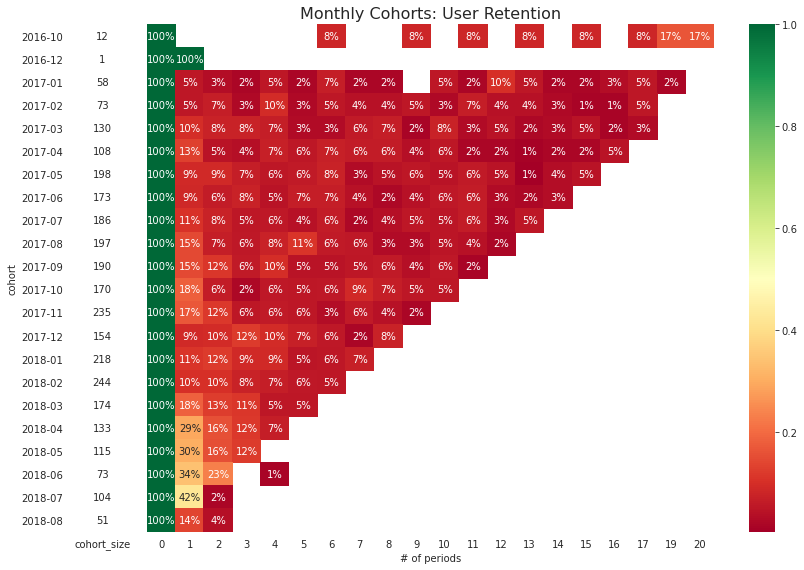

In [88]:
import matplotlib.colors as mcolors

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

_Les premiers clients sont revenus dernièrement.  
Ceux de 2017/01 sont revenus 1 an plus tard (10%)  
Le taux de rétention a bien augmenté au fur et à mesure des années  
Période d'achat récurrente en janvier  
Difficulté à faire revenir les clients sur la durée (fidélisation)_

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

In [101]:
retention_matrix['e'] = retention_matrix[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20]].sum(axis=1)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,19,20,e
cohort,,,,,,,,,,,,,,,,,,,,,
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.083333,NaN,NaN,0.083333,...,0.083333,NaN,0.083333,NaN,0.083333,NaN,0.083333,0.166667,0.166667,0.833333
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2017-01,1.0,0.051724,0.034483,0.017241,0.051724,0.017241,0.068966,0.017241,0.017241,NaN,...,0.017241,0.103448,0.051724,0.017241,0.017241,0.034483,0.051724,0.017241,NaN,0.637931
2017-02,1.0,0.054795,0.068493,0.027397,0.095890,0.027397,0.054795,0.041096,0.041096,0.054795,...,0.068493,0.041096,0.041096,0.027397,0.013699,0.013699,0.054795,NaN,NaN,0.753425
2017-03,1.0,0.100000,0.076923,0.076923,0.069231,0.030769,0.030769,0.061538,0.069231,0.015385,...,0.030769,0.046154,0.023077,0.030769,0.046154,0.015385,0.030769,NaN,NaN,0.830769
2017-04,1.0,0.129630,0.046296,0.037037,0.074074,0.055556,0.074074,0.064815,0.064815,0.037037,...,0.018519,0.018519,0.009259,0.018519,0.018519,0.046296,NaN,NaN,NaN,0.768519
2017-05,1.0,0.090909,0.090909,0.070707,0.055556,0.060606,0.075758,0.030303,0.045455,0.055556,...,0.060606,0.045455,0.005051,0.035354,0.045455,NaN,NaN,NaN,NaN,0.813131
2017-06,1.0,0.086705,0.063584,0.075145,0.046243,0.069364,0.069364,0.040462,0.023121,0.040462,...,0.063584,0.028902,0.023121,0.034682,NaN,NaN,NaN,NaN,NaN,0.722543
2017-07,1.0,0.107527,0.075269,0.053763,0.059140,0.043011,0.064516,0.021505,0.037634,0.053763,...,0.064516,0.026882,0.053763,NaN,NaN,NaN,NaN,NaN,NaN,0.709677


Here is the code for the analysis of customers who have bought more than once : 

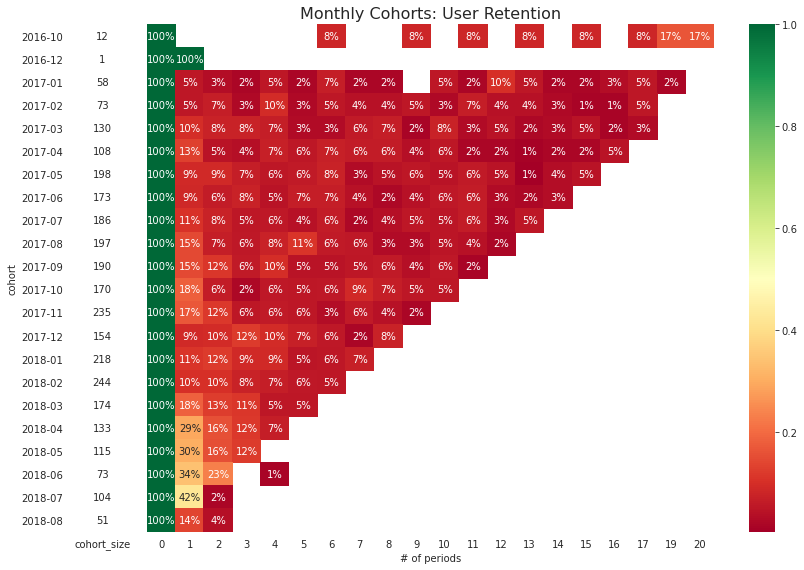

In [89]:
#start from your df created doing the RFM segmentation
df_c = df_raw
df_c = df_c.drop(['order_status', 'order_delivered_customer_date', 'payment_value', 'review_score', 'payment_installments', 'payment_type', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'product_category_name_english'], axis=1)
df_c = df_c.drop_duplicates()
df_c


df_c = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()